# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading DataSet

In [2]:
df = pd.read_csv("DataSets/data.xlsx - Sheet1.csv")

In [3]:
df.shape

(3998, 38)

In [4]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,06-01-2012 00:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,09-01-2013 00:00,present,assistant manager,Indore,m,10-04-1989 00:00,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,06-01-2014 00:00,present,systems engineer,Chennai,f,08-03-1992 00:00,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,07-01-2011 00:00,present,senior software engineer,Gurgaon,m,12-05-1989 00:00,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,03-01-2014 00:00,03-01-2015 00:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [5]:
df["DOJ"] = pd.to_datetime(df["DOJ"])
df["DOB"] = pd.to_datetime(df["DOB"],format='mixed',dayfirst=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [7]:
df.columns = df.columns.str.lower()

# Classifiying into categorical and numerical

In [8]:
cat_df = df.select_dtypes(include=["object"])
cat_df["12graduation"] = df["12graduation"]
cat_df["collegetier"] = df["collegetier"]
cat_df["collegecitytier"] = df["collegecitytier"]
cat_df["graduationyear"] = df["graduationyear"]
cat_df.shape

(3998, 13)

In [9]:
cat_df.columns

Index(['dol', 'designation', 'jobcity', 'gender', '10board', '12board',
       'degree', 'specialization', 'collegestate', '12graduation',
       'collegetier', 'collegecitytier', 'graduationyear'],
      dtype='object')

In [10]:
for i in cat_df:
    print(cat_df[i].agg(["unique","nunique"]))
    print(cat_df[i].value_counts())
    print("*"*50)

unique     [present, 03-01-2015 00:00, 05-01-2015 00:00, ...
nunique                                                   67
Name: dol, dtype: object
dol
present             1875
04-01-2015 00:00     573
03-01-2015 00:00     124
05-01-2015 00:00     112
01-01-2015 00:00      99
                    ... 
03-01-2005 00:00       1
10-01-2015 00:00       1
02-01-2010 00:00       1
02-01-2011 00:00       1
10-01-2010 00:00       1
Name: count, Length: 67, dtype: int64
**************************************************
unique     [senior quality engineer, assistant manager, s...
nunique                                                  419
Name: designation, dtype: object
designation
software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                   

In [11]:
num_df = df.select_dtypes(include=["int","float"])
num_df.pop("12graduation")
num_df.pop("collegetier")
num_df.pop("collegecitytier")
num_df.pop("graduationyear")
num_df.describe()

,id,salary,10percentage,12percentage,collegeid,collegegpa,collegecityid,english,logical,quant,...,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,74.466366,5156.851426,71.486171,5156.851426,501.649075,501.598799,513.378189,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,10.999933,4802.261482,8.167338,4802.261482,104.940021,86.783297,122.302332,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,40.000000,2.000000,6.450000,2.000000,180.000000,195.000000,120.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,66.000000,494.000000,66.407500,494.000000,425.000000,445.000000,430.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,74.400000,3879.000000,71.720000,3879.000000,500.000000,505.000000,515.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,82.600000,8818.000000,76.327500,8818.000000,570.000000,565.000000,595.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,98.700000,18409.000000,99.930000,18409.000000,875.000000,795.000000,900.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [12]:
num_df.shape

(3998, 23)

In [13]:
num_df.columns

Index(['id', 'salary', '10percentage', '12percentage', 'collegeid',
       'collegegpa', 'collegecityid', 'english', 'logical', 'quant', 'domain',
       'computerprogramming', 'electronicsandsemicon', 'computerscience',
       'mechanicalengg', 'electricalengg', 'telecomengg', 'civilengg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [14]:
num_df.head()

,id,salary,10percentage,12percentage,collegeid,collegegpa,collegecityid,english,logical,quant,...,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,84.3,95.8,1141,78.00,1141,515,585,525,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,85.4,85.0,5807,70.06,5807,695,610,780,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,85.0,68.2,64,70.00,64,615,545,370,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,85.6,83.6,6920,74.64,6920,635,585,625,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,78.0,76.8,11368,73.90,11368,545,625,465,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


# Creating new columns

In [15]:
eng_sector = df[['electronicsandsemicon', 'computerscience', 'mechanicalengg','electricalengg', 'telecomengg', 'civilengg']]
df["engineering_score"] = eng_sector.sum(axis=1)

In [16]:
personality = df[['conscientiousness','agreeableness', 'extraversion', 'nueroticism','openess_to_experience']]
df["personality_test_score"] = personality.sum(axis=1)

In [17]:
cognitive = df[['english', 'logical', 'quant', 'domain', 'computerprogramming']]
df["cognitive"] = cognitive.sum(axis=1)

In [76]:
df["cuurent_year"] = '2024-02-23'
df["cuurent_year"] = pd.to_datetime(df["cuurent_year"])
df["dob"] = pd.to_datetime(df["dob"])
to_years = 365.25 * 24 * 3600
df["age"] = (df['cuurent_year'] - df['dob']).apply(lambda age: age.total_seconds() / to_years)
df["age"] = df["age"].apply(int)

In [18]:
num = df[['salary', '10percentage', '12percentage', "collegecityid",'collegegpa',"engineering_score","personality_test_score","cognitive"]]

# Visualization of Numerical columns

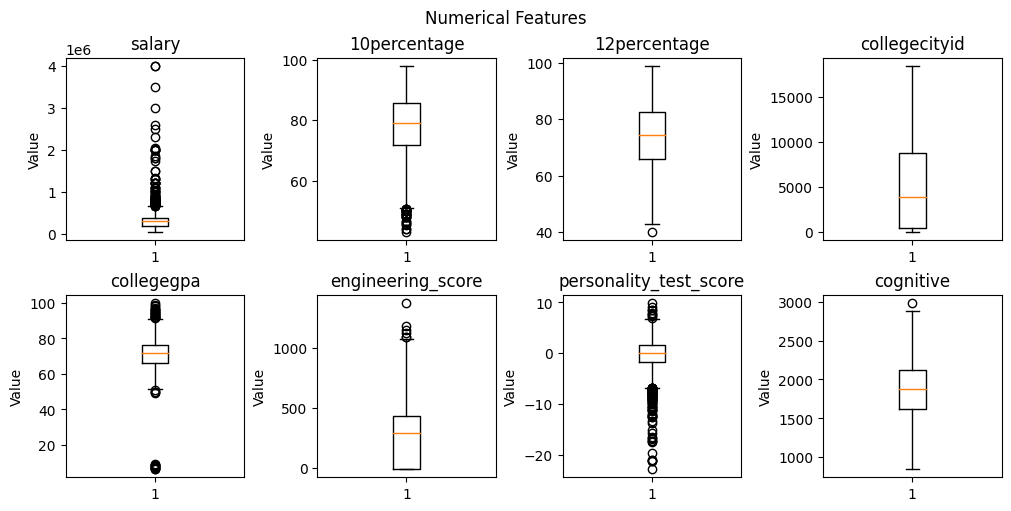

In [19]:
num_visual = num.columns
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10,5),layout="constrained")
fig.suptitle("Numerical Features")
axs = axs.flatten()
for i, col in enumerate(num_visual):
    ax = axs[i]
    ax.boxplot(df[col])
    ax.set_title(col)
    ax.set_ylabel('Value')

# Data Distribution of categorical columns

In [20]:
cat_df.columns

Index(['dol', 'designation', 'jobcity', 'gender', '10board', '12board',
       'degree', 'specialization', 'collegestate', '12graduation',
       'collegetier', 'collegecitytier', 'graduationyear'],
      dtype='object')

<Axes: xlabel='graduationyear', ylabel='count'>

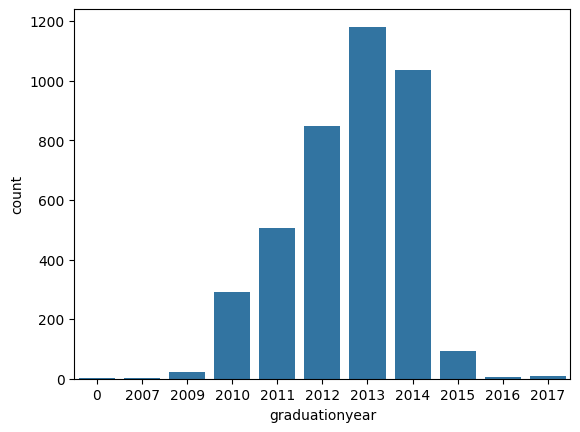

In [21]:
sns.countplot(data=df,x="graduationyear")

<Axes: xlabel='gender', ylabel='count'>

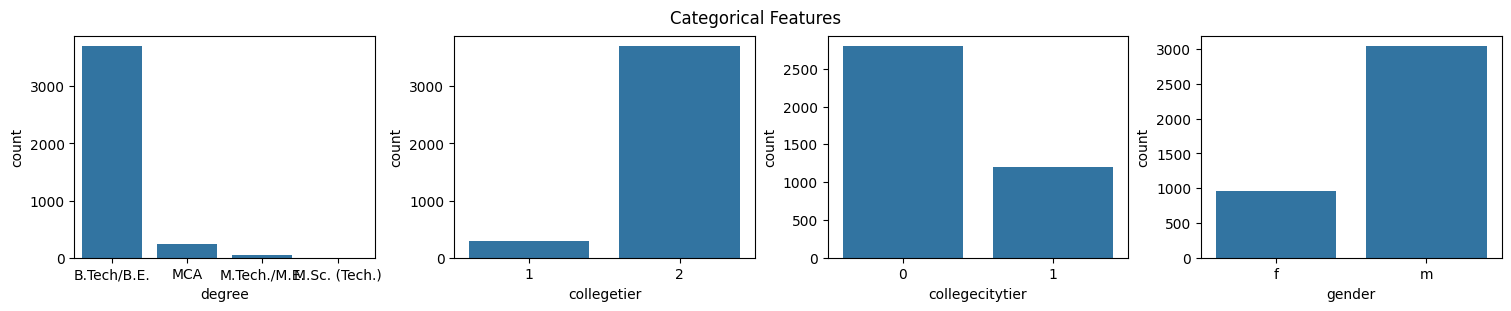

In [22]:
fig,ax = plt.subplots(1,4,figsize=(15,3),layout="constrained")
fig.suptitle("Categorical Features")
sns.countplot(data=df,x="degree",ax=ax[0])
sns.countplot(data=df,x="collegetier",ax=ax[1])
sns.countplot(data=df,x="collegecitytier",ax=ax[2])
sns.countplot(data=df,x="gender",ax=ax[3])

<Axes: xlabel='12graduation', ylabel='count'>

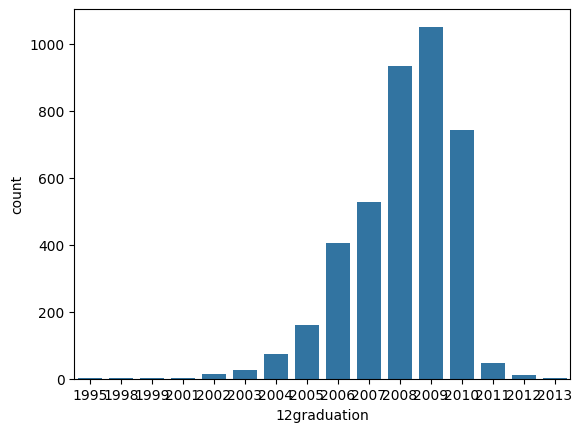

In [23]:
sns.countplot(data=df,x="12graduation")

<Axes: xlabel='degree', ylabel='count'>

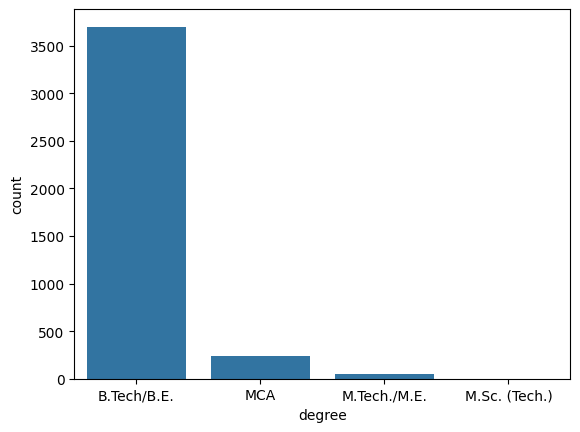

In [24]:
sns.countplot(data=cat_df,x="degree")

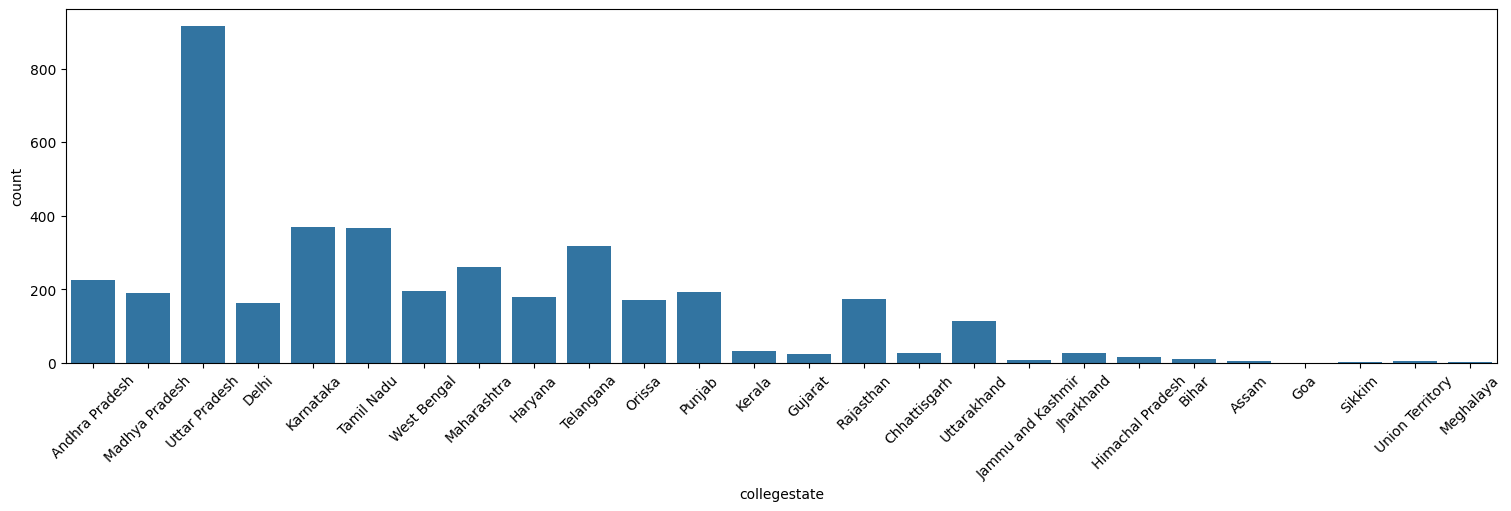

In [25]:
fig = plt.figure(figsize=(15,5),layout="constrained")
sns.countplot(data=cat_df,x="collegestate")
plt.xticks(rotation=45)
plt.show()

In [26]:
grp = df.groupby("designation")

In [27]:
df["salary"].value_counts()

salary
300000     293
180000     239
200000     205
325000     188
120000     165
          ... 
2050000      1
144000       1
1320000      1
755000       1
925000       1
Name: count, Length: 177, dtype: int64

In [28]:
g = df.groupby('designation')['salary'].agg(['sum'])
runs = g.sort_values(by=['sum'], ascending=False)[:10]
runs

,sum
designation,
software engineer,183915000
system engineer,72580000
software developer,68470000
programmer analyst,47230000
systems engineer,43585000
senior software engineer,39170000
software test engineer,33745000
java software engineer,33445000
project engineer,24095000


In [29]:
deg = df.groupby('designation')['salary'].agg(['sum'])[:10]
deg

,sum
designation,
.net developer,7595000
.net web developer,785000
account executive,1150000
account manager,350000
admin assistant,205000
administrative coordinator,190000
administrative support,200000
aircraft technician,100000
android developer,9235000


# Relationship between salary and other features

<Axes: xlabel='salary', ylabel='computerprogramming'>

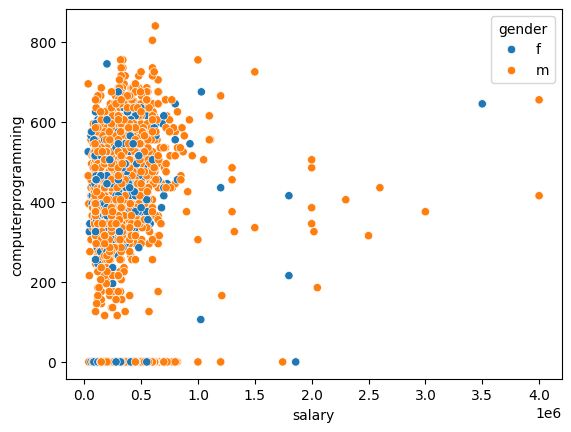

In [32]:
sns.scatterplot(data=df,x="salary",y="computerprogramming",hue="gender")

<Axes: xlabel='salary', ylabel='10percentage'>

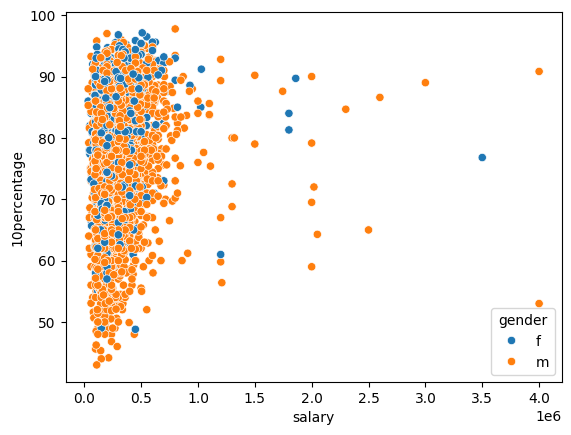

In [33]:
sns.scatterplot(data=df,x="salary",y="10percentage",hue="gender")

<Axes: xlabel='salary', ylabel='12percentage'>

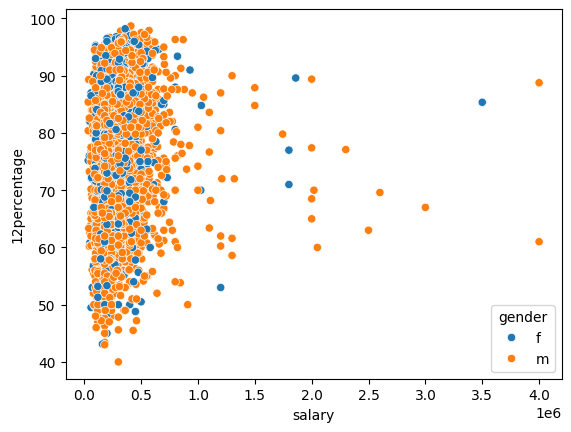

In [34]:
sns.scatterplot(data=df,x="salary",y="12percentage",hue="gender")

<Axes: xlabel='salary', ylabel='collegegpa'>

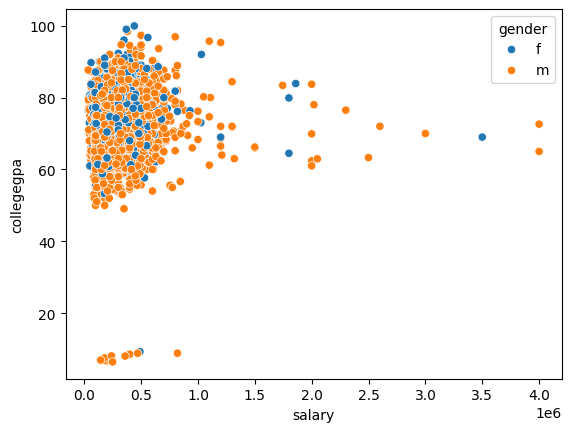

In [35]:
sns.scatterplot(data=df,x="salary",y="collegegpa",hue="gender")

<Axes: xlabel='personality_test_score', ylabel='salary'>

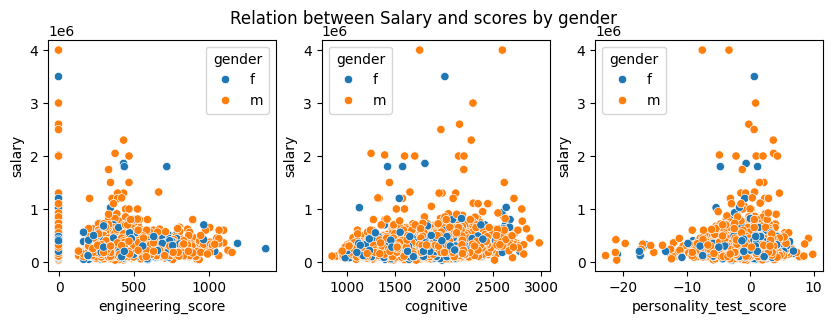

In [36]:
fig,axs=plt.subplots(1,3,figsize=(10,3))
fig.suptitle("Relation between Salary and scores by gender")
sns.scatterplot(data=df,x="engineering_score",y="salary",hue="gender",ax=axs[0])
sns.scatterplot(data=df,x="cognitive",y="salary",hue="gender",ax=axs[1])
sns.scatterplot(data=df,x="personality_test_score",y="salary",hue="gender",ax=axs[2])

# Comparing scores in different sectors

In [37]:
df.columns

Index(['id', 'salary', 'doj', 'dol', 'designation', 'jobcity', 'gender', 'dob',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'collegeid', 'collegetier', 'degree', 'specialization', 'collegegpa',
       'collegecityid', 'collegecitytier', 'collegestate', 'graduationyear',
       'english', 'logical', 'quant', 'domain', 'computerprogramming',
       'electronicsandsemicon', 'computerscience', 'mechanicalengg',
       'electricalengg', 'telecomengg', 'civilengg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'engineering_score', 'personality_test_score', 'cognitive'],
      dtype='object')

In [38]:
df.groupby("gender")["salary"].agg(["min","max","mean"])

,min,max,mean
gender,,,
f,35000,3500000,294937.304075
m,35000,4000000,311716.211772


<Axes: >

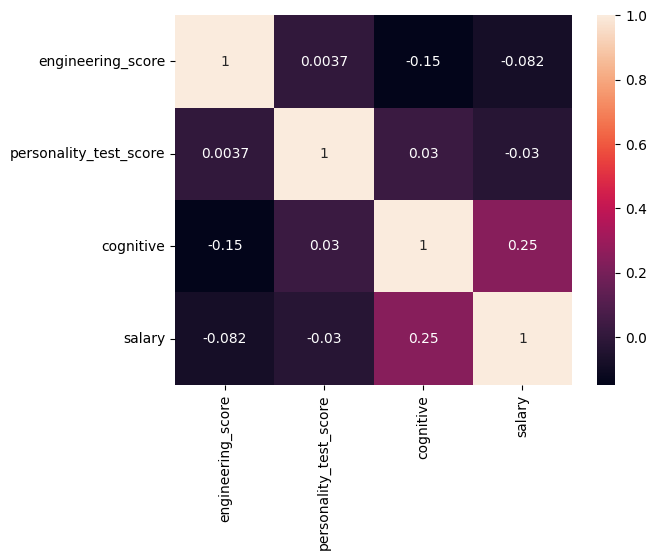

In [39]:
new = df[['engineering_score', 'personality_test_score', 'cognitive',"salary"]]
sns.heatmap(data=new.corr(), annot=True)

In [40]:
df.groupby("gender")[['engineering_score', 'personality_test_score', 'cognitive']].agg(["min","max","mean"])

engineering_score                   personality_test_score          \
                     min   max        mean                    min     max   
gender                                                                      
f                     -6  1376  237.901776               -20.9719  6.9562   
m                     -6  1151  267.032226               -22.8237  9.8686   

                   cognitive                            
            mean         min          max         mean  
gender                                                  
f       0.284539  974.013962  2780.999250  1857.220026  
m      -0.346851  849.125690  2980.998876  1874.336525

In [41]:
df[['engineering_score', 'personality_test_score', 'cognitive']].agg(["min","max","mean"])

,engineering_score,personality_test_score,cognitive
min,-6.00000,-22.823700,849.125690
max,1376.00000,9.868600,2980.998876
mean,260.05928,-0.195715,1870.239354


<Axes: xlabel='cognitive', ylabel='Count'>

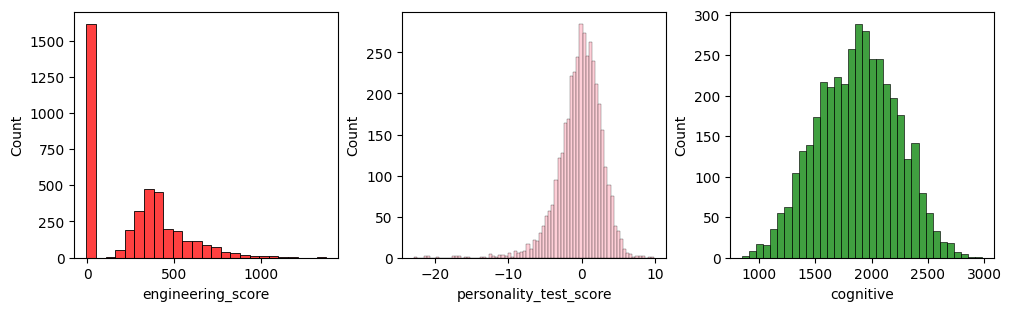

In [42]:
fig,axs = plt.subplots(1,3,figsize=(10,3),layout="constrained")
sns.histplot(data=df,x="engineering_score",ax=axs[0],color="red")
sns.histplot(data=df,x="personality_test_score",ax=axs[1],color="pink")
sns.histplot(data=df,x="cognitive",ax=axs[2],color="green")

<Axes: xlabel='personality_test_score', ylabel='salary'>

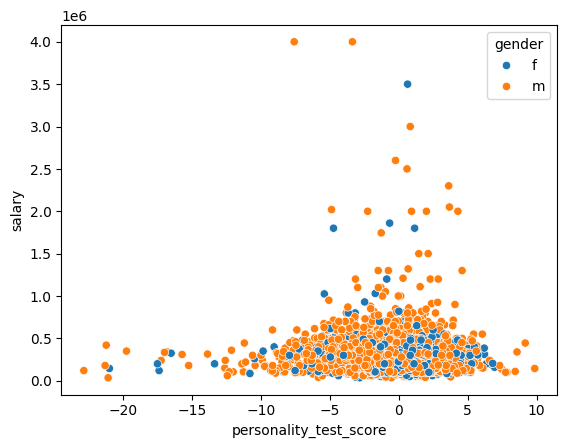

In [43]:
sns.scatterplot(data=df,x="personality_test_score",y="salary",hue="gender")

# Gender on salary

<Axes: xlabel='gender', ylabel='salary'>

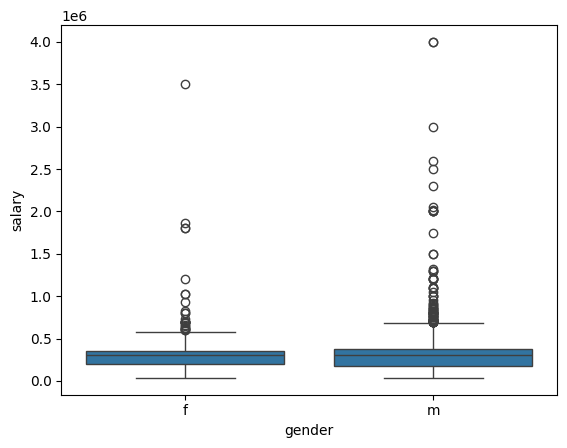

In [44]:
sns.boxplot(data=df,x="gender",y="salary")

# salary based on graduation

<Axes: xlabel='12graduation', ylabel='salary'>

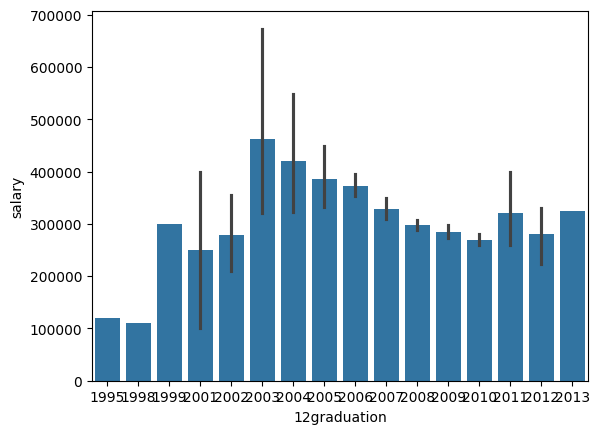

In [45]:
sns.barplot(data=df,x="12graduation",y="salary")

# collegetier Salary

<Axes: xlabel='collegetier', ylabel='salary'>

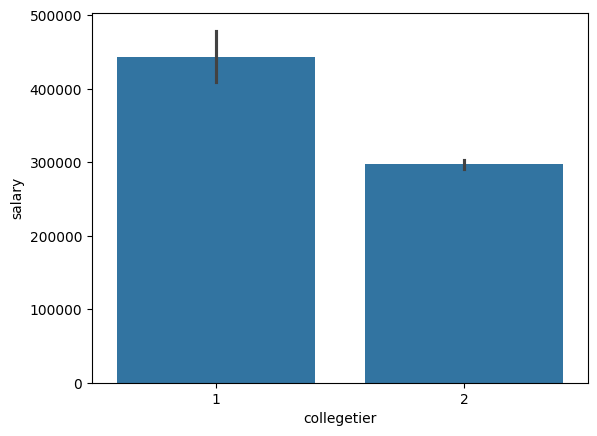

In [46]:
sns.barplot(data=df,x="collegetier",y="salary")

<Axes: xlabel='graduationyear', ylabel='collegegpa'>

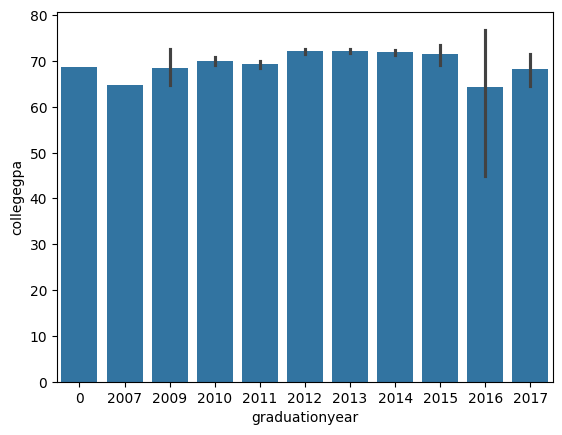

In [47]:
sns.barplot(data=df,x="graduationyear",y="collegegpa")

In [48]:
df.columns

Index(['id', 'salary', 'doj', 'dol', 'designation', 'jobcity', 'gender', 'dob',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'collegeid', 'collegetier', 'degree', 'specialization', 'collegegpa',
       'collegecityid', 'collegecitytier', 'collegestate', 'graduationyear',
       'english', 'logical', 'quant', 'domain', 'computerprogramming',
       'electronicsandsemicon', 'computerscience', 'mechanicalengg',
       'electricalengg', 'telecomengg', 'civilengg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'engineering_score', 'personality_test_score', 'cognitive'],
      dtype='object')

<Axes: xlabel='graduationyear', ylabel='salary'>

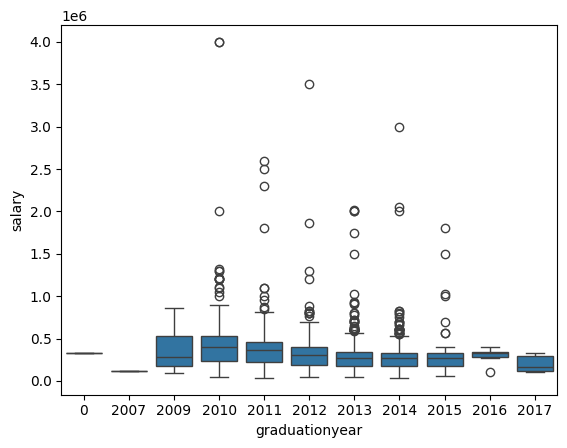

In [49]:
sns.boxplot(data=df,x="graduationyear",y="salary")

# Top 100 salaries data

In [50]:
new_df = df.nlargest(100, ['salary'])

In [51]:
new_df["designation"].nunique()

57

In [52]:
new_df.columns

Index(['id', 'salary', 'doj', 'dol', 'designation', 'jobcity', 'gender', 'dob',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'collegeid', 'collegetier', 'degree', 'specialization', 'collegegpa',
       'collegecityid', 'collegecitytier', 'collegestate', 'graduationyear',
       'english', 'logical', 'quant', 'domain', 'computerprogramming',
       'electronicsandsemicon', 'computerscience', 'mechanicalengg',
       'electricalengg', 'telecomengg', 'civilengg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'engineering_score', 'personality_test_score', 'cognitive'],
      dtype='object')

<Axes: xlabel='doj', ylabel='salary'>

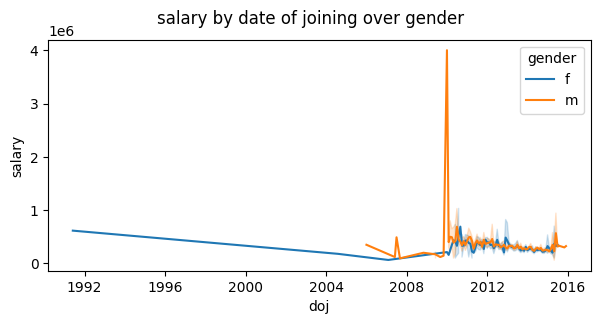

In [53]:
fig = plt.figure(figsize=(7,3))
fig.suptitle("salary by date of joining over gender")
sns.lineplot(data=df,x="doj",y="salary",hue="gender")

# Impact of gender in specialization for top 100 salaries

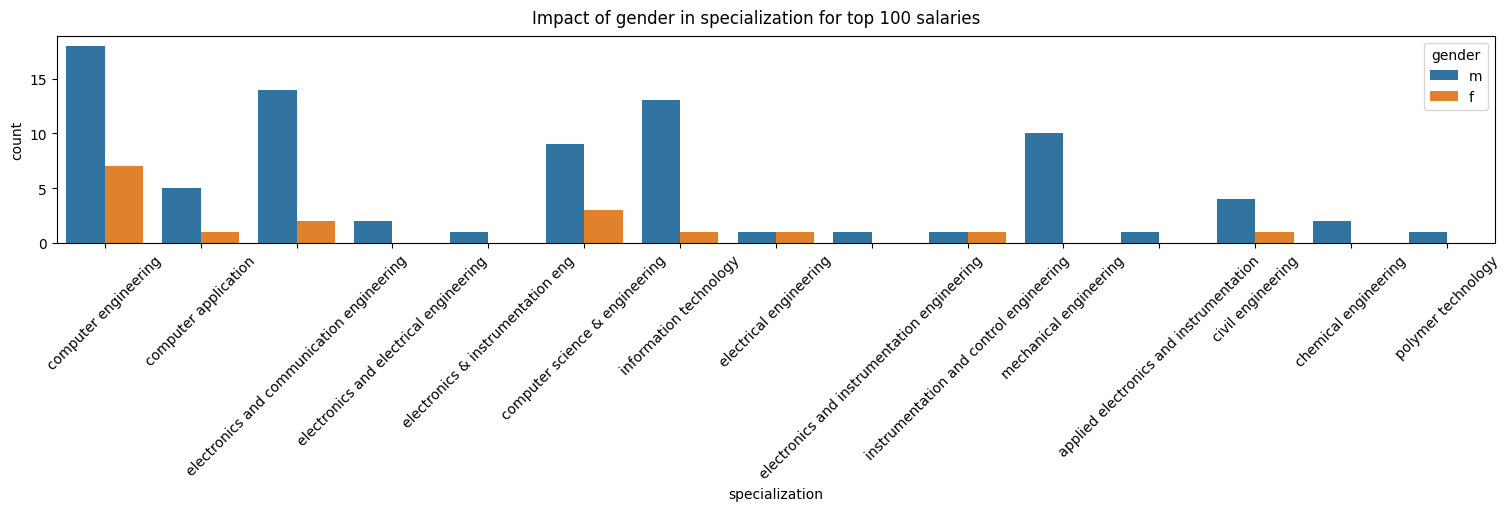

In [54]:
fig = plt.figure(figsize=(15,5),layout="constrained")
fig.suptitle("Impact of gender in specialization for top 100 salaries")
sns.countplot(data=new_df,hue="gender",x="specialization")
plt.xticks(rotation=45)
plt.show()

# Average salary for designation

In [68]:
deg = df.groupby("designation")["salary"].mean()
deg.sort_values(ascending=False)

designation
junior manager                           1.300000e+06
senior developer                         1.110000e+06
data scientist                           8.966667e+05
field engineer                           8.016667e+05
asst. manager                            8.000000e+05
                                             ...     
documentation specialist                 8.000000e+04
visiting faculty                         7.000000e+04
trainee software developer               6.000000e+04
web designer and joomla administrator    6.000000e+04
secretary                                4.500000e+04
Name: salary, Length: 419, dtype: float64

<Axes: xlabel='degree', ylabel='collegegpa'>

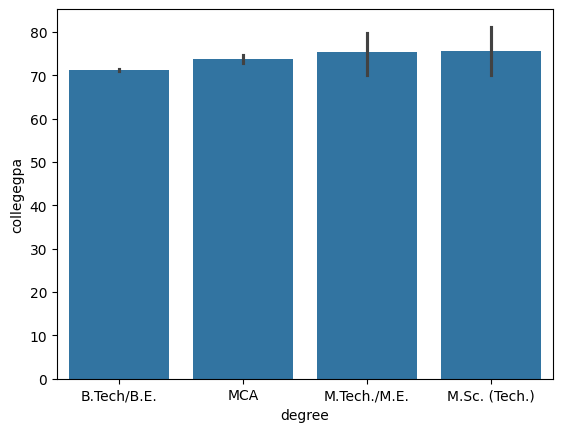

In [56]:
sns.barplot(data=df,x="degree",y="collegegpa")

<Axes: xlabel='collegegpa', ylabel='salary'>

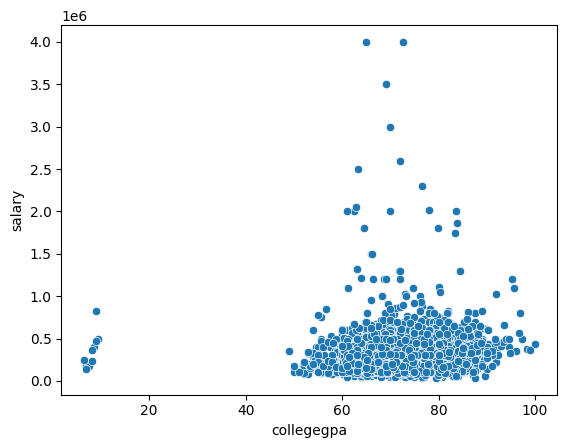

In [57]:
sns.scatterplot(data=df,y="salary",x="collegegpa")

In [70]:
sep = df.groupby("specialization")["salary"].sum()
sep.sort_values(ascending=False)

specialization
electronics and communication engineering      261195000
computer engineering                           224460000
computer science & engineering                 206415000
information technology                         203605000
computer application                            68415000
mechanical engineering                          63809000
electronics and electrical engineering          56235000
electronics & telecommunications                35520000
electrical engineering                          24090000
electronics & instrumentation eng               11665000
civil engineering                               11055000
electronics and instrumentation engineering      8840000
instrumentation and control engineering          7880000
information science engineering                  7460000
electronics engineering                          5310000
industrial & production engineering              3845000
biotechnology                                    3815000
other           

In [79]:
df.groupby("age")["salary"].agg(["min","mean","max"])

,min,mean,max
age,,,
26,450000,450000.000000,450000
28,170000,205000.000000,240000
29,85000,274318.181818,570000
30,35000,274052.419355,2000000
31,40000,274266.839378,2000000
32,45000,285589.139344,3000000
33,40000,310190.886700,3500000
34,35000,339121.376812,2600000
35,50000,357614.942529,1200000


In [81]:
age = df.groupby("age")["salary"].sum()
age.sort_values(ascending=False)

age
32    278735000
33    251875000
31    211734000
34    187195000
35    124450000
30     67965000
36     56525000
37     23505000
38     11140000
39      8305000
29      6035000
40       910000
26       450000
41       420000
28       410000
42       410000
46       120000
Name: salary, dtype: int64